In [1]:
# import kagglehub
# import os
# import shutil
# path = kagglehub.dataset_download("andrewmvd/okcupid-profiles")
# new_path = "C:\\Users\\jw256\\Desktop\\MGTA 415\\Final Project\\"
# os.makedirs(new_path, exist_ok=True)
# for file in os.listdir(path):
#     shutil.move(os.path.join(path, file), new_path)
# print("Path to dataset files:", path)

# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("okcupid_profiles.csv")
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Check Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [4]:
df.shape

(59946, 31)

***Counts of Missing Values***

In [5]:
df.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

In [6]:
isna_cols = df.loc[:, df.isna().any()].columns
missing_values = df[isna_cols[:12]].isna().sum().sort_values(ascending=False)
missing_values

offspring    35561
diet         24395
religion     20226
pets         19921
drugs        14080
sign         11056
job           8198
education     6628
ethnicity     5680
body_type     5296
drinks        2985
height           3
dtype: int64

## Plot of Missing Values

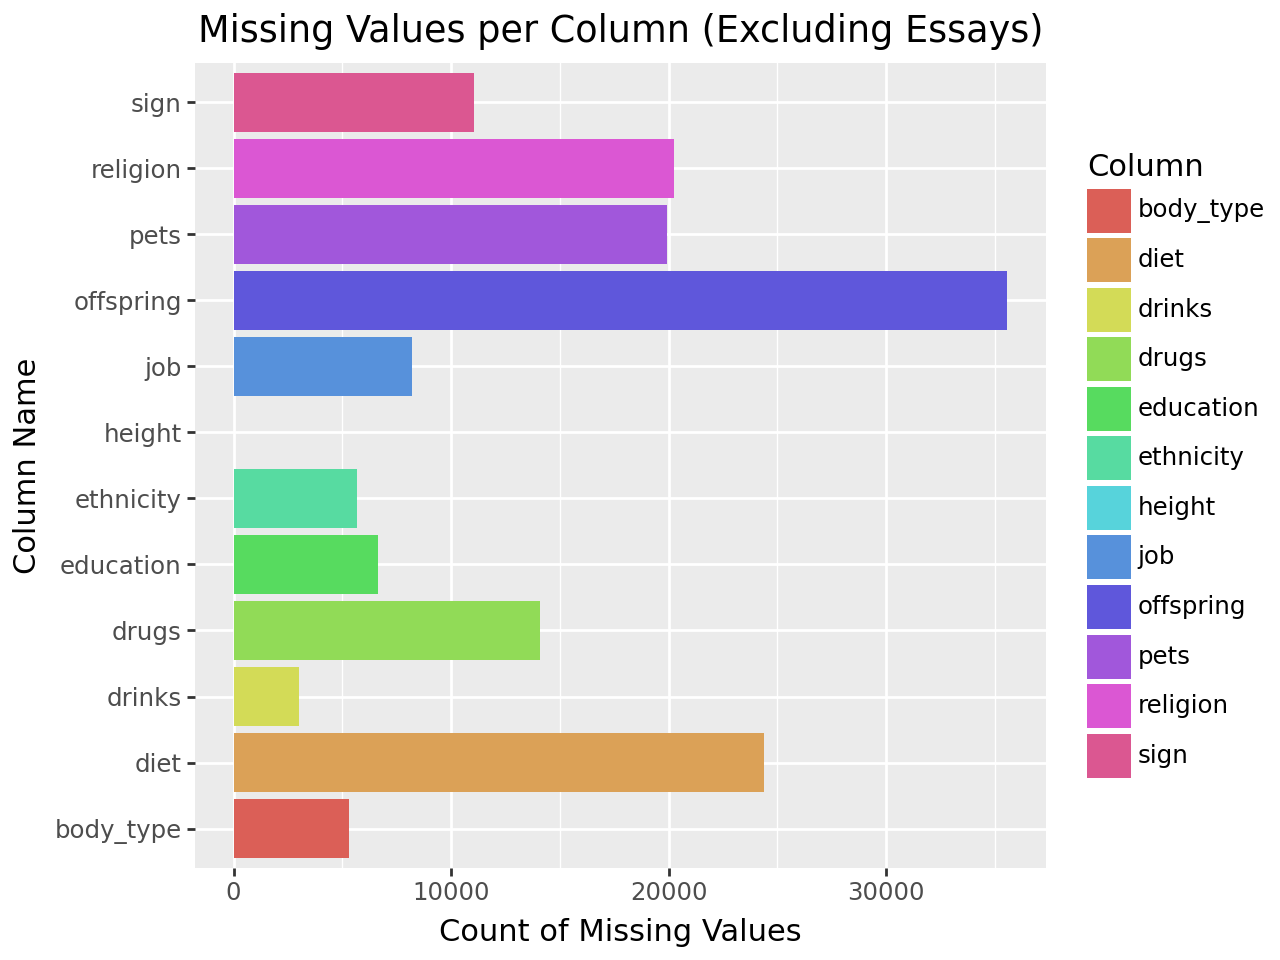

In [7]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, coord_flip, theme_minimal, labs, scale_fill_manual

# Create a DataFrame from missing values
missing_df = pd.DataFrame({'Column': missing_values.index, 'MissingCount': missing_values.values})

# Create the ggplot bar chart with different colors for each bar
plot = (
    ggplot(missing_df, aes(x='Column', y='MissingCount', fill='Column')) +  # Assign different colors per column
    geom_bar(stat='identity') +
    coord_flip() +  # Flip coordinates for better readability
    labs(title="Missing Values per Column (Excluding Essays)", x="Column Name", y="Count of Missing Values")
)

# Display the plot
plot

In [8]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


***Filling In Missing Values With Mean Imputation***

In [9]:
df.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

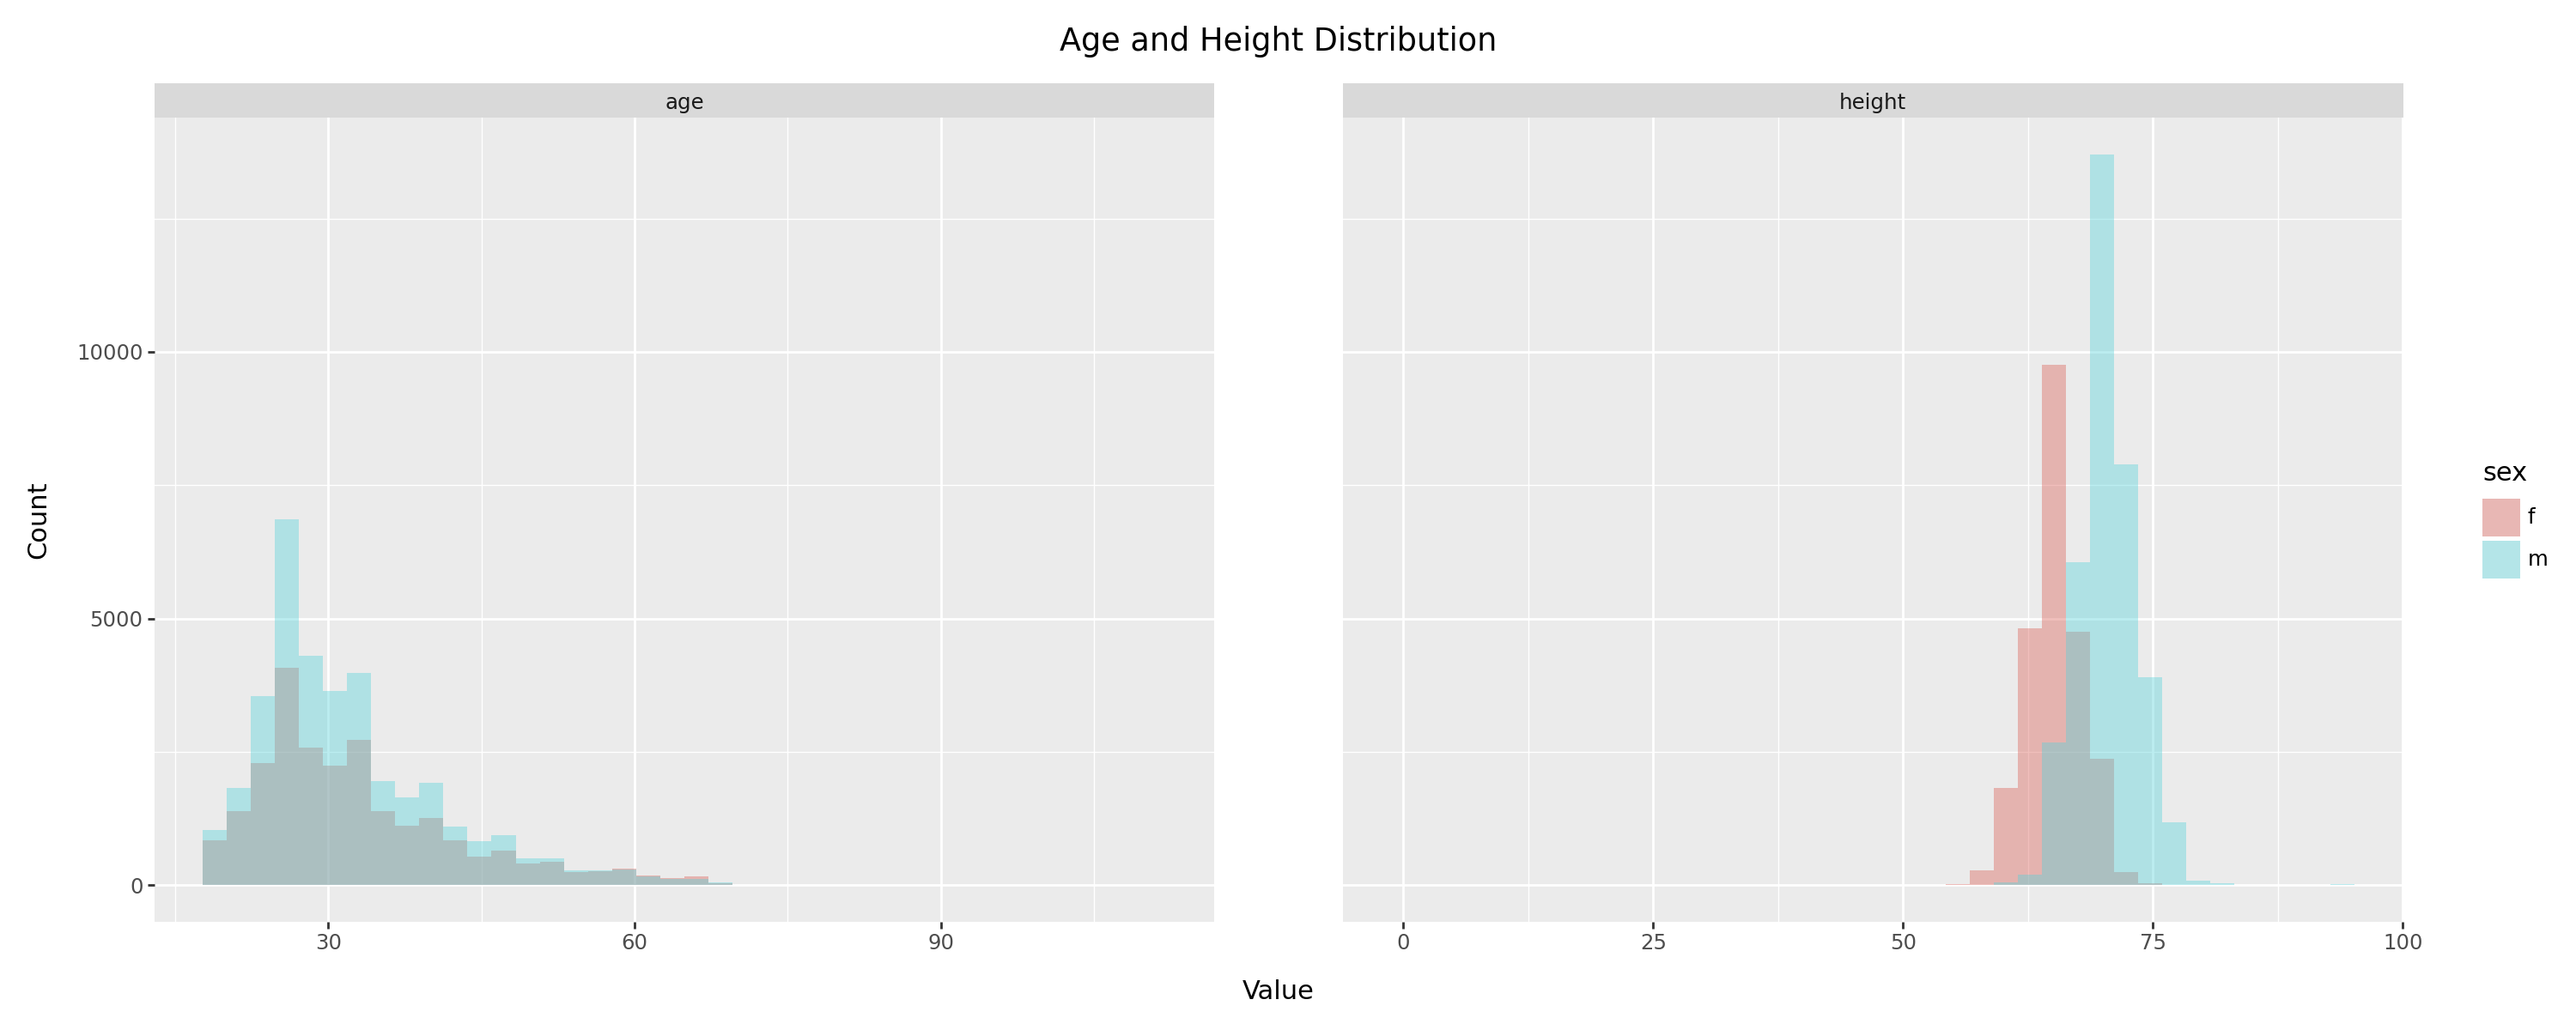

In [10]:
df['age'] = df['age'].fillna(df['age'].mean())
df['height'] = df['height'].fillna(df['height'].mean())
num_cols = ['age', 'height']
titles = ['Age Distribution', 'Height Distribution']

from plotnine import geom_histogram, facet_wrap, theme
# Reshape DataFrame to long format for ggplot
df_long = df.melt(id_vars=['sex'], value_vars=num_cols, var_name='Variable', value_name='Value')

# Create the ggplot histogram with facets
plot = (
    ggplot(df_long, aes(x='Value', fill='sex')) +  # Map value to x-axis, color by sex
    geom_histogram(bins=40, alpha=0.4, position="identity") +  # 40 bins, transparent bars
    facet_wrap('~Variable', scales='free_x', nrow=1.9) +  # Create separate panels for each variable
    labs(title="Age and Height Distribution", x="Value", y="Count") +  # Labels
    theme(figure_size=(15, 6), panel_spacing=0.05)
)

# Display the plot
plot

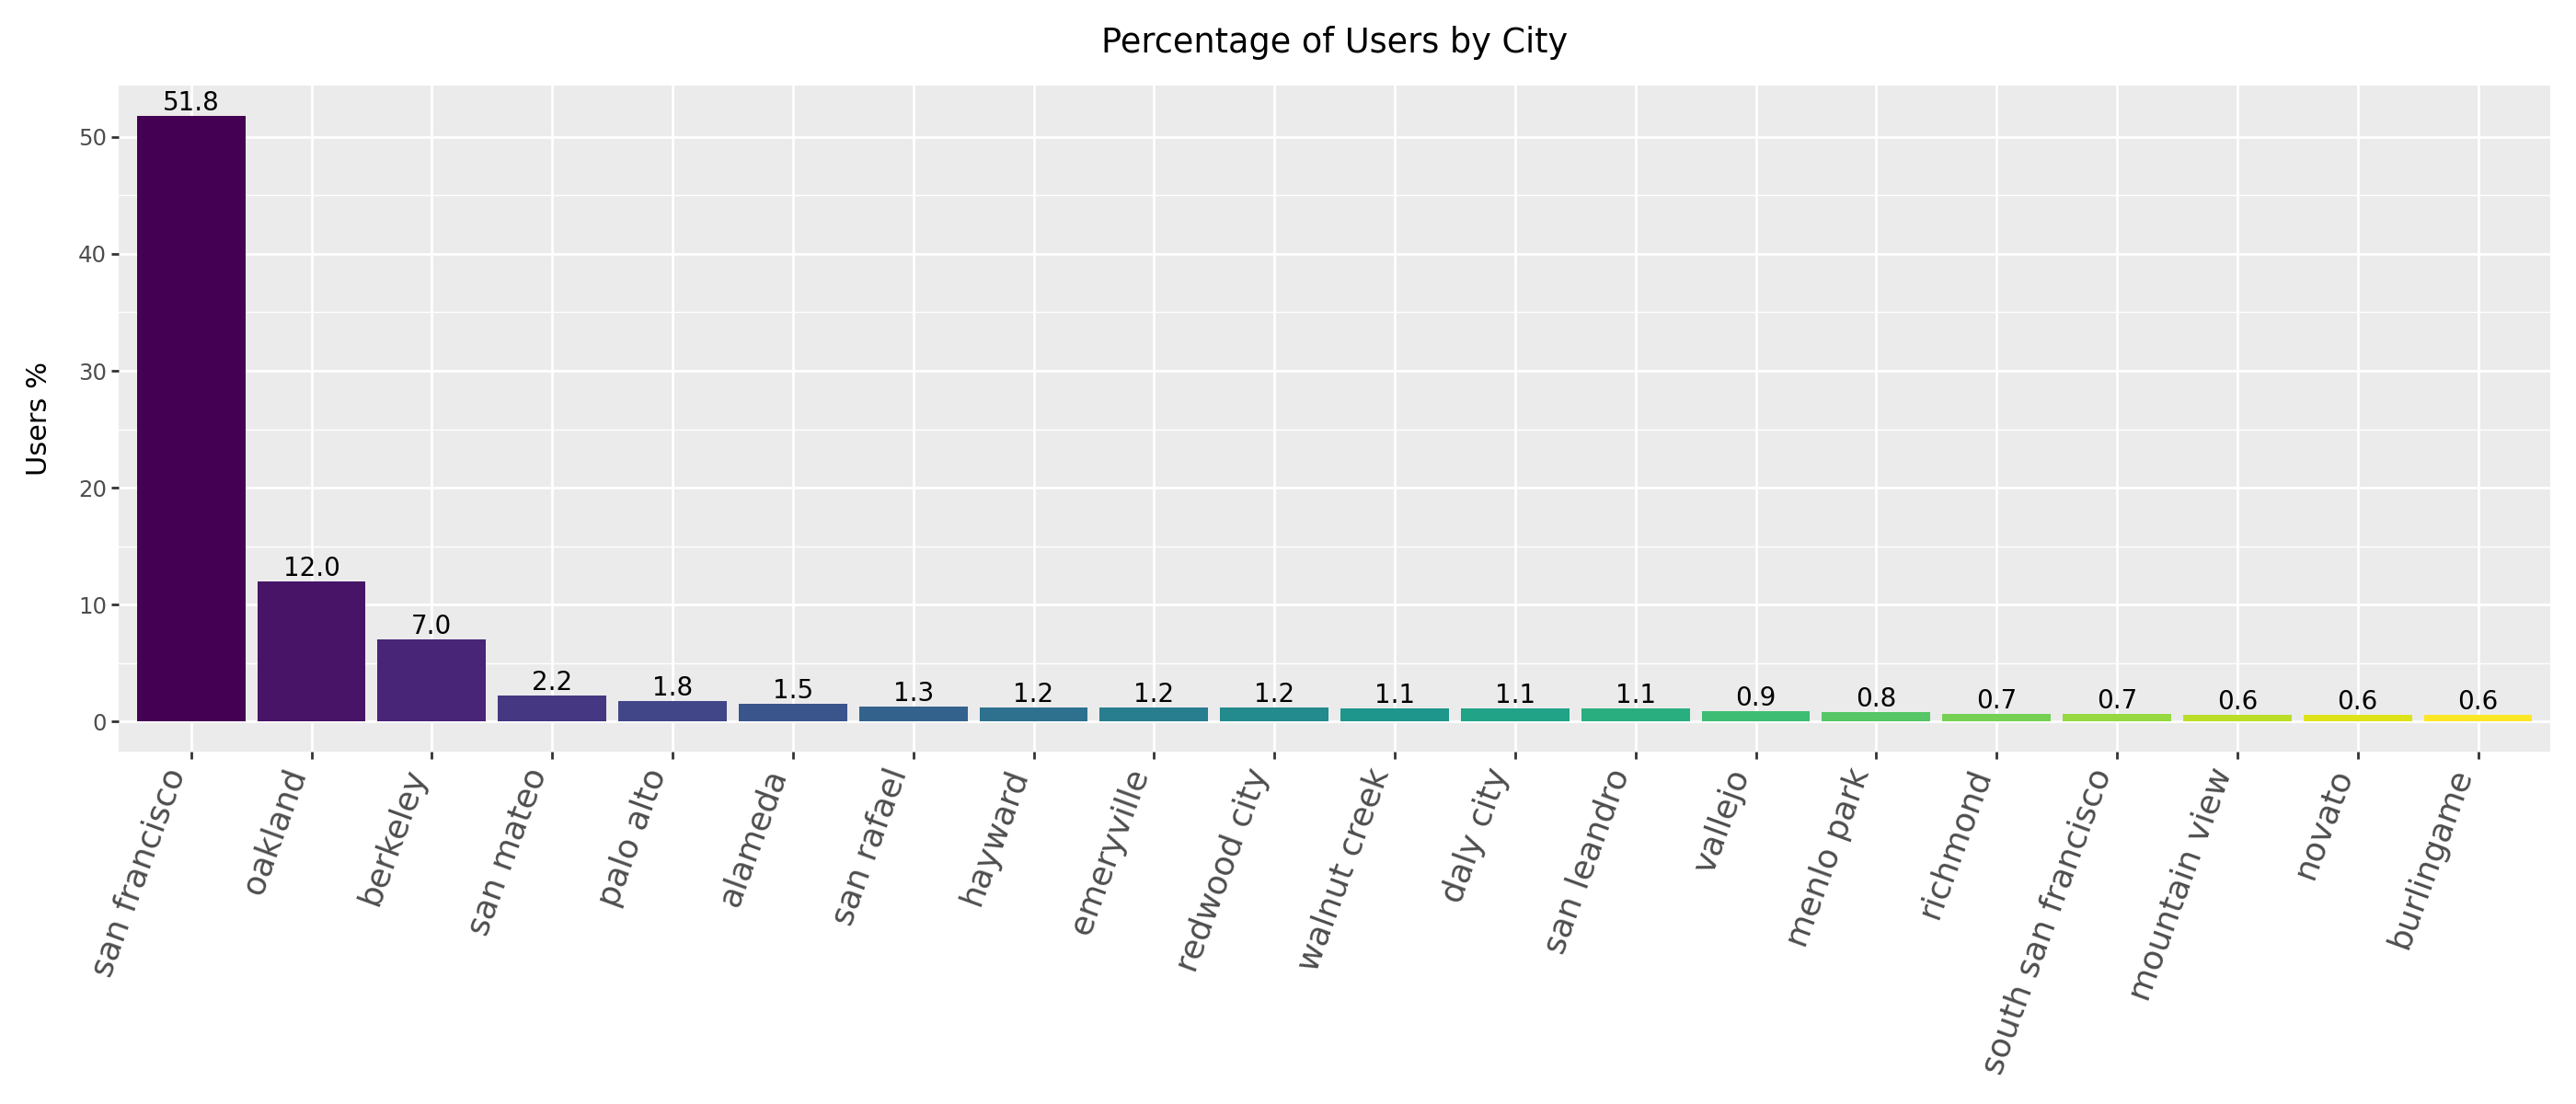

In [11]:
df[['city_', 'state_']] = df.location.str.split(pat=', ', 
                                                expand=True).loc[:,0:1]
df.loc[:, ['location', 'city_', 'state_']]
df.state_.value_counts(normalize=True).round(4)[:5]*100
city_count = df.city_.value_counts(normalize=True).round(3)[:20]*100

import pandas as pd
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text, geom_text

city_count_df = city_count.reset_index()
city_count_df.columns = ['City', 'UsersPercent']  # Rename columns
city_count_df = city_count_df.sort_values(by='UsersPercent', ascending=False)  # Sort descending

# Convert 'City' column to a categorical type with ordering
city_count_df['City'] = pd.Categorical(city_count_df['City'], categories=city_count_df['City'], ordered=True)

# Create the ggplot bar chart
plot = (
    ggplot(city_count_df, aes(x='City', y='UsersPercent', fill='City')) +  # Bar chart with sorted order
    geom_bar(stat='identity', show_legend=False) +  # Use identity to plot actual percentages
    labs(title="Percentage of Users by City", x="", y="Users %") +  # Titles and labels
    theme(
        axis_text_x=element_text(rotation=70, size=13, ha='right'),  # Rotate x-axis labels
        figure_size=(14, 6)  # Increase figure size
    ) +
    geom_text(aes(label='UsersPercent'), va='bottom', format_string='{:.1f}', size=10)  # Show % values on bars
)

plot


In [12]:
city_count_df

,City,UsersPercent
0,san francisco,51.8
1,oakland,12.0
2,berkeley,7.0
3,san mateo,2.2
4,palo alto,1.8
5,alameda,1.5
6,san rafael,1.3
7,hayward,1.2
8,emeryville,1.2
9,redwood city,1.2


# Feature Engineering

In [13]:
def map_cat(a_string, a_dic):
    """
    a_string: a string we want to map with a_dic
    a_dic: a dictionary whose keys are tuples
    """
    for k in a_dic:
        if a_string in k:
            return a_dic.get(k)
    return np.NaN

### Sex as a Categorical Variable

In [14]:
df['sex'] = pd.Categorical(df['sex'])

### Body Type Simplified

In [15]:
from pandas.api.types import CategoricalDtype
body_types_dic = {('skinny', 'used up', 'thin'): 'ectomorph',
                 ('average', 'fit', 'athletic', 'jacked'): 'mesomorph',
                 ('a little extra', 'curvy', 'full figured'): 'endomorph'}

body_categories = CategoricalDtype(categories=['ectomorph', 'mesomorph',
                                              'endomorph'], ordered=True)

df['body_type_simplified'] = df.body_type.apply(map_cat, args=(body_types_dic,)).astype(body_categories)
df.body_type_simplified = df.body_type_simplified.fillna(body_categories.categories
                        [int(np.median(df.body_type_simplified.cat.codes))])
df.body_type_simplified.value_counts(normalize=True)

body_type_simplified
mesomorph    0.759700
endomorph    0.126147
ectomorph    0.114153
Name: proportion, dtype: float64

In [16]:
from plotnine import ggplot, aes, geom_bar, after_stat, labs, theme, element_text, position_dodge

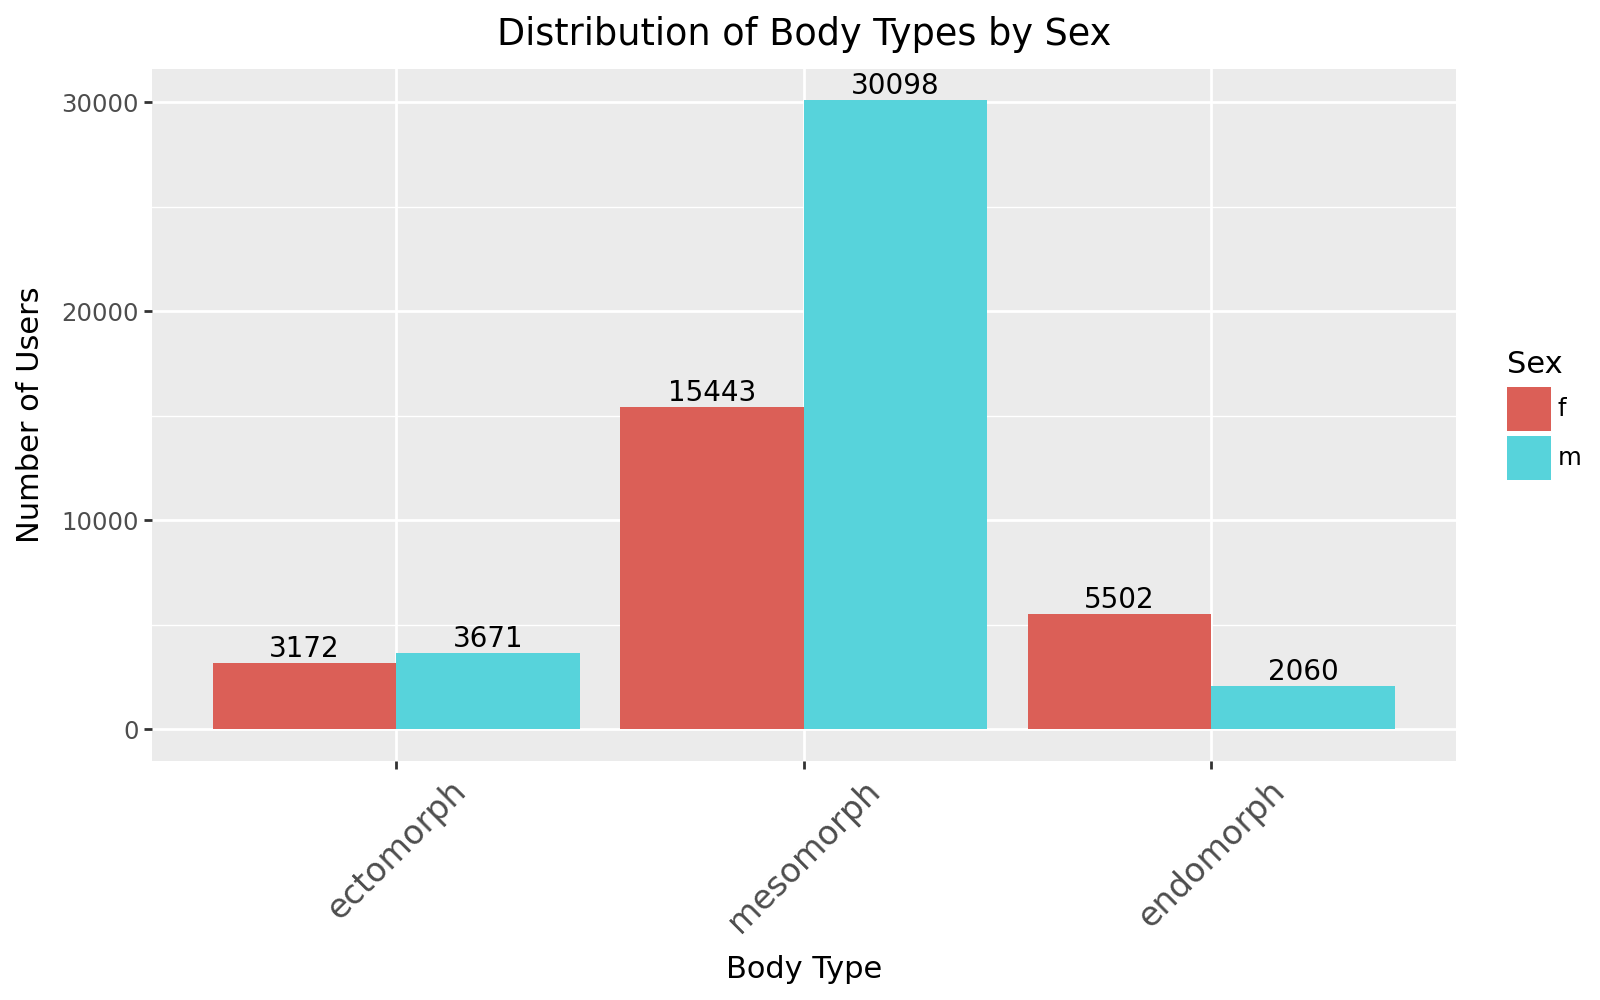

In [17]:
df['body_type_simplified'] = pd.Categorical(df['body_type_simplified'], 
                                            categories=['ectomorph', 'mesomorph', 'endomorph'], 
                                            ordered=True)

plot = (
    ggplot(df, aes(x='body_type_simplified', fill='sex')) +  # Hue by sex
    geom_bar(position="dodge") +  # Separate bars for each sex
    geom_text(
        aes(y=after_stat('count'), label=after_stat('count')), 
        stat='count', 
        position=position_dodge(width=0.9),  # Align text with bars
        va='bottom',  # Place text on top of bars
        size=10
    ) +
    labs(title="Distribution of Body Types by Sex", x="Body Type", y="Number of Users", fill="Sex") +  # Labels
    theme(
        axis_text_x=element_text(rotation=45, size=12),  # Rotate x-axis labels
        figure_size=(8, 5)  # Adjust figure size
    )
)
plot

### Education Simplified

In [18]:
val = df['education'].value_counts()
val

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

In [19]:
education_categories = CategoricalDtype(categories=['High school or less',
                                                   'Some college',
                                                   'College or more',
                                                   'Post graduate degree'],
                                       ordered=True)
education_dic= {('graduated from high school','dropped out of high school', 
                 'working on high school','high school'): 'High school or less',
                
                ('working on two-year college','dropped out of space camp',
                'two-year college', 'graduated from two-year college',
                'dropped out of college/university','dropped out of two-year college', 
                 'dropped out of med school', 'dropped out of law school'): 'Some college',
                
                ('working on college/university', 'working on space camp',
                'graduated from masters program','graduated from college/university',
                'working on masters program','graduated from space camp',
                'college/university','graduated from law school', 
                 'working on ph.d program','space camp', 
                 'graduated from med school','working on med school',
                'masters program', 'dropped out of ph.d program',
                'law school','dropped out of masters program',
                'working on law school', 'med school') : 'College or more', 
                
                ('graduated from ph.d program','ph.d program'): 'Post graduate degree'}
df['education_simplified'] = df.education.apply(map_cat, args=(education_dic,)).astype(education_categories)
df.education_simplified = df.education_simplified.fillna(education_categories.categories[int(np.median(df['education_simplified'].cat.codes))]).astype(education_categories)
df.education_simplified.value_counts()

education_simplified
College or more         52369
Some college             4566
High school or less      1713
Post graduate degree     1298
Name: count, dtype: int64

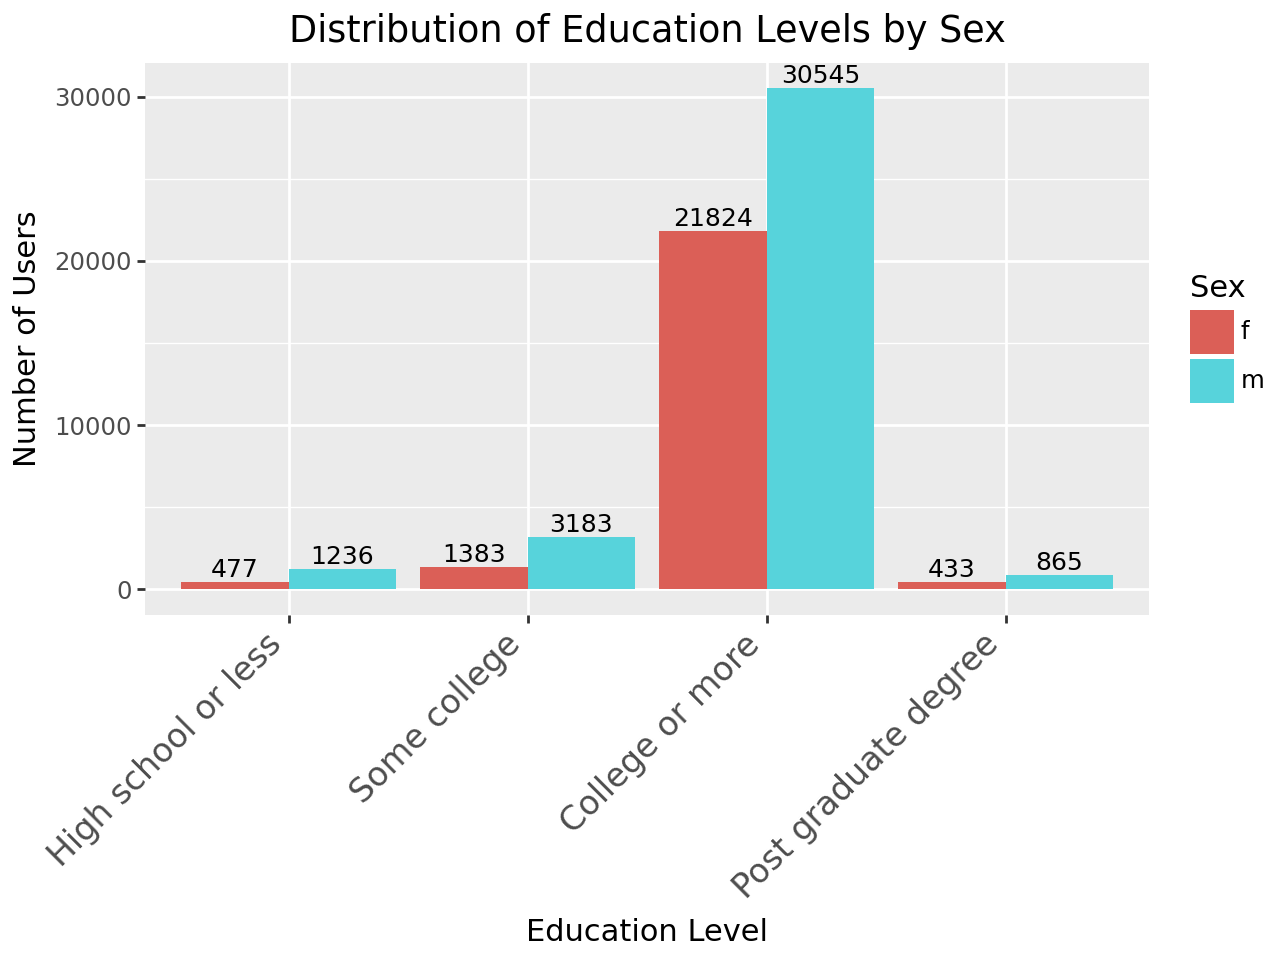

In [20]:
df['education_simplified'] = pd.Categorical(df['education_simplified'], 
                                            categories=['High school or less', 'Some college', 'College or more', 'Post graduate degree'], 
                                            ordered=True)

plot = (
    ggplot(df, aes(x='education_simplified', fill='sex')) +  # Hue by sex
    geom_bar(position="dodge") +  # Separate bars for each sex
    geom_text(
        aes(y=after_stat('count'), label=after_stat('count')), 
        stat='count', 
        position=position_dodge(width=0.9),  # Align text with bars
        va='bottom',  # Place text on top of bars
        size=9
    ) +
    labs(title="Distribution of Education Levels by Sex", x="Education Level", y="Number of Users", fill="Sex") +  # Labels
    theme(
        axis_text_x=element_text(rotation=45, size=12, ha='right')  # Rotate x-axis labels
    )
)
plot

### Drinks Simplified

In [21]:
drinks_categories = CategoricalDtype(categories=['not at all', 'rarely',
                                                'socially',
                                                'often', 'very often',
                                                'desperately'],
                                    ordered=True)
df['drinks_simplified'] = df.drinks.astype(drinks_categories)
df.drinks_simplified = df.drinks_simplified.fillna(drinks_categories.categories[int(np.median(df.drinks_simplified.cat.codes))])
df.drinks_simplified.value_counts()

drinks_simplified
socially       44765
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64

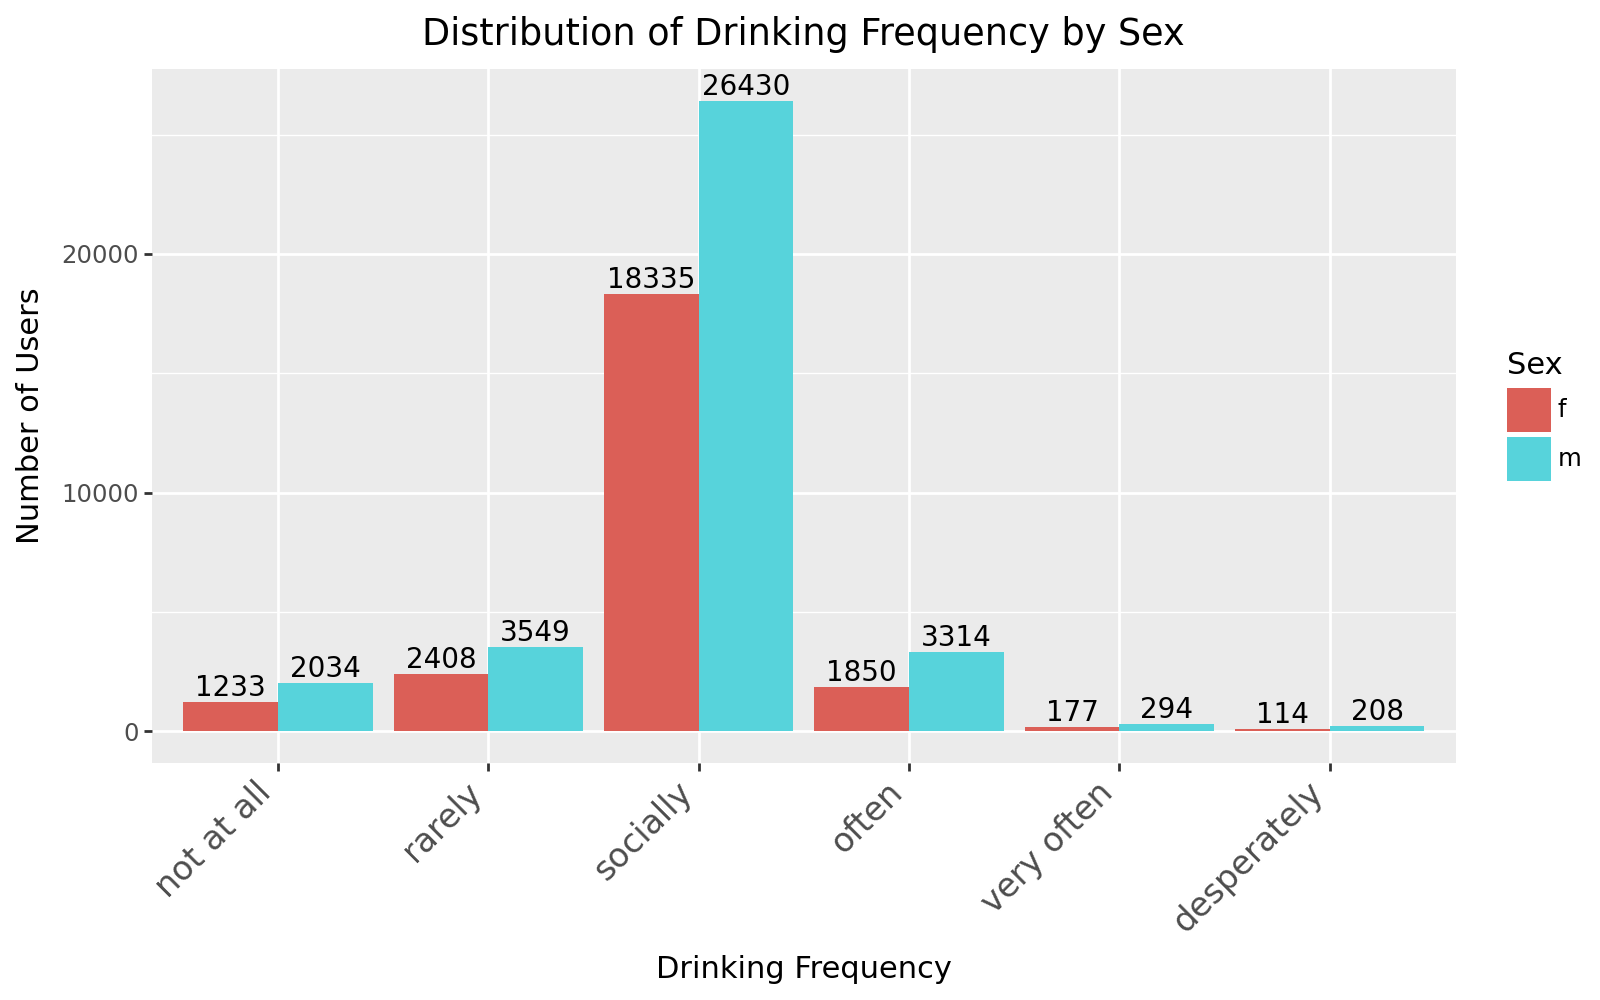

In [22]:
df['drinks_simplified'] = pd.Categorical(df['drinks_simplified'], 
                                         categories=['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], 
                                         ordered=True)
plot = (
    ggplot(df, aes(x='drinks_simplified', fill='sex')) +  # Hue by sex
    geom_bar(position="dodge") +  # Separate bars for each sex
    geom_text(
        aes(y=after_stat('count'), label=after_stat('count')), 
        stat='count', 
        position=position_dodge(width=0.9),  # Align text with bars
        va='bottom',  # Place text on top of bars
        size=10
    ) +
    labs(title="Distribution of Drinking Frequency by Sex", x="Drinking Frequency", y="Number of Users", fill="Sex") +  # Labels
    theme(
        axis_text_x=element_text(rotation=45, size=12, ha='right'),  # Rotate x-axis labels
        figure_size=(8, 5)  # Adjust figure size
    )
)
plot

### Drugs Simplified

In [23]:
df.drugs.value_counts(dropna=False, normalize=True)

drugs
never        0.629300
NaN          0.234878
sometimes    0.128983
often        0.006839
Name: proportion, dtype: float64

***Most people don't do drugs. Filling NA with never.***

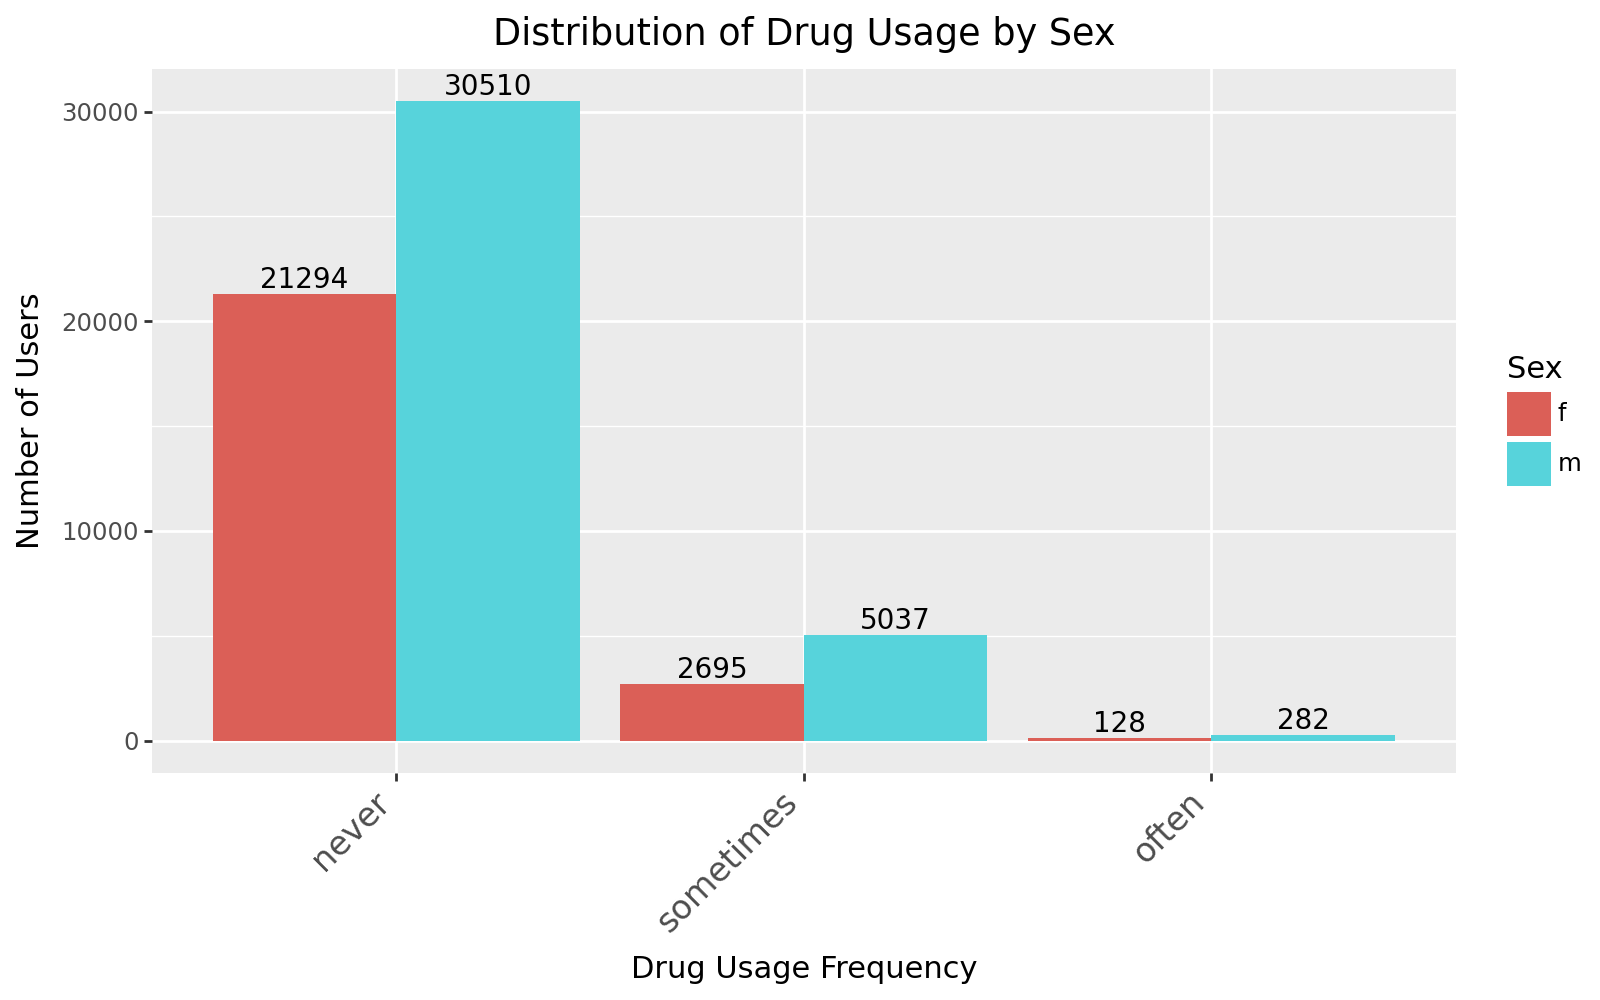

In [24]:
df['drugs_fixed'] = df.drugs.fillna('never')
df.drugs_fixed = pd.Categorical(df.drugs_fixed, categories=['never', 'sometimes',
                                                 'often'],
                          ordered=True)
df['drugs_fixed'] = pd.Categorical(df['drugs_fixed'], categories=['never', 'sometimes', 'often'], ordered=True)
plot = (
    ggplot(df, aes(x='drugs_fixed', fill='sex')) +  # Hue by sex
    geom_bar(position="dodge") +  # Separate bars for each sex
    geom_text(
        aes(y=after_stat('count'), label=after_stat('count')), 
        stat='count', 
        position=position_dodge(width=0.9),  # Align text with bars
        va='bottom',  # Place text on top of bars
        size=10
    ) +
    labs(title="Distribution of Drug Usage by Sex", x="Drug Usage Frequency", y="Number of Users", fill="Sex") +  # Labels
    theme(
        axis_text_x=element_text(rotation=45, size=12, ha='right'),  # Rotate x-axis labels
        figure_size=(8, 5)  # Adjust figure size
    )
)
plot

### Smokes Simplified

In [25]:
df.smokes.value_counts(dropna=False, normalize=True)

smokes
no                0.732259
NaN               0.091949
sometimes         0.063174
when drinking     0.050712
yes               0.037217
trying to quit    0.024689
Name: proportion, dtype: float64

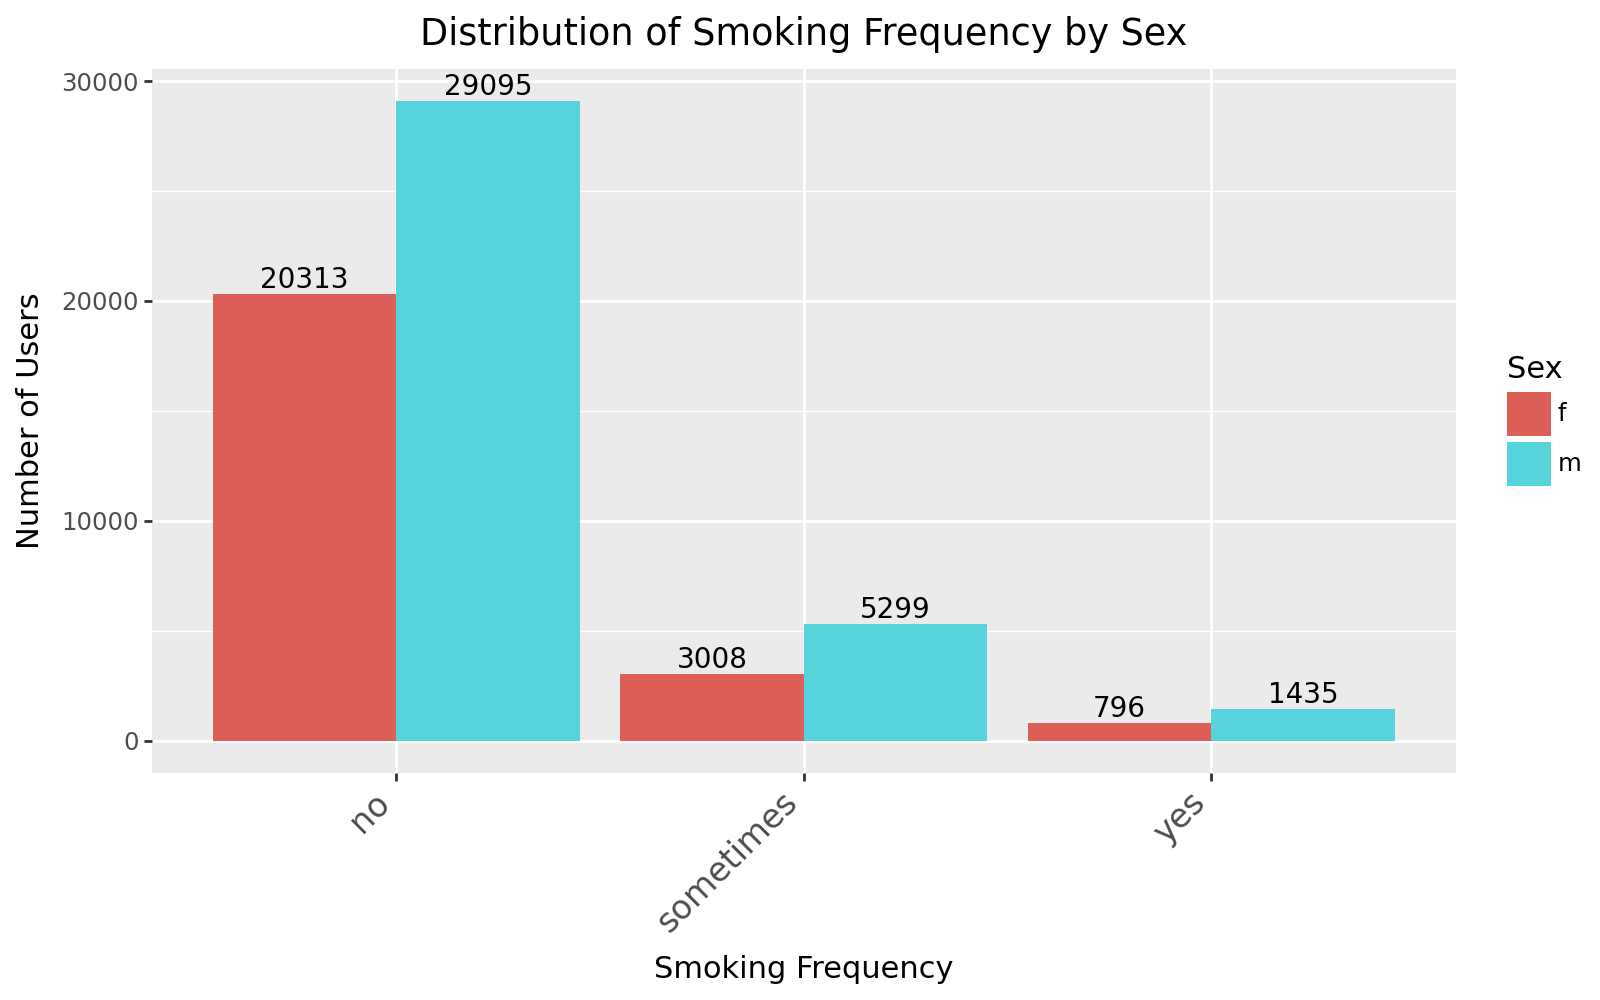

In [26]:
smokes_dic = {('no',): 'no',
             ('sometimes', 'when drinking', 'trying to quit'): 'sometimes',
             ('yes',):'yes'}
smokes_categories = CategoricalDtype(categories=['no', 'sometimes',
                                                'yes'], ordered=True)
df['smokes_fixed'] = df.smokes.apply(map_cat, args=(smokes_dic,)).astype(smokes_categories)
df.smokes_fixed = df.smokes_fixed.fillna('no').astype(smokes_categories)

import pandas as pd
from plotnine import ggplot, aes, geom_bar, geom_text, labs, theme, element_text, after_stat, position_dodge

df['smokes_fixed'] = pd.Categorical(df['smokes_fixed'], categories=['no', 'sometimes', 'yes'], ordered=True)
df['sex'] = pd.Categorical(df['sex'])  

plot = (
    ggplot(df, aes(x='smokes_fixed', fill='sex')) +  
    geom_bar(position="dodge") +  
    geom_text(
        aes(y=after_stat('count'), label=after_stat('count')), 
        stat='count', 
        position=position_dodge(width=0.9),  
        va='bottom',  
        size=10
    ) +
    labs(title="Distribution of Smoking Frequency by Sex", x="Smoking Frequency", y="Number of Users", fill="Sex") +  
    theme(
        axis_text_x=element_text(rotation=45, size=12, ha='right'),  
        figure_size=(8, 5)  
    )
)

plot



### Pets Simplified

In [27]:
df.pets.value_counts(dropna=False)

pets
NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [28]:
df.pets = df.pets.fillna('No')

In [29]:
import re
def likes_pet(s, species):
    dogs_regex = re.compile(r'((?<!dis)likes |has )dogs')
    cats_regex = re.compile(r'((?<!dis)likes |has )cats')
    if species == 'dog':
        return 'Yes' if bool(dogs_regex.search(s)) else 'No'
    elif species == 'cat':
        return 'Yes' if bool(cats_regex.search(s)) else 'No'
    else:
        return 'No'

In [30]:
df['likes_dogs'] = df.pets.apply(likes_pet, args=('dog',))
df['likes_cats'] = df.pets.apply(likes_pet, args = ('cat',))
df['likes_dogs'] = pd.Categorical(df.likes_dogs, categories=['No',
                                                        'Yes'], ordered=True)
df['likes_cats'] = pd.Categorical(df.likes_cats,categories=['No',
                                                             'Yes'], ordered=True)

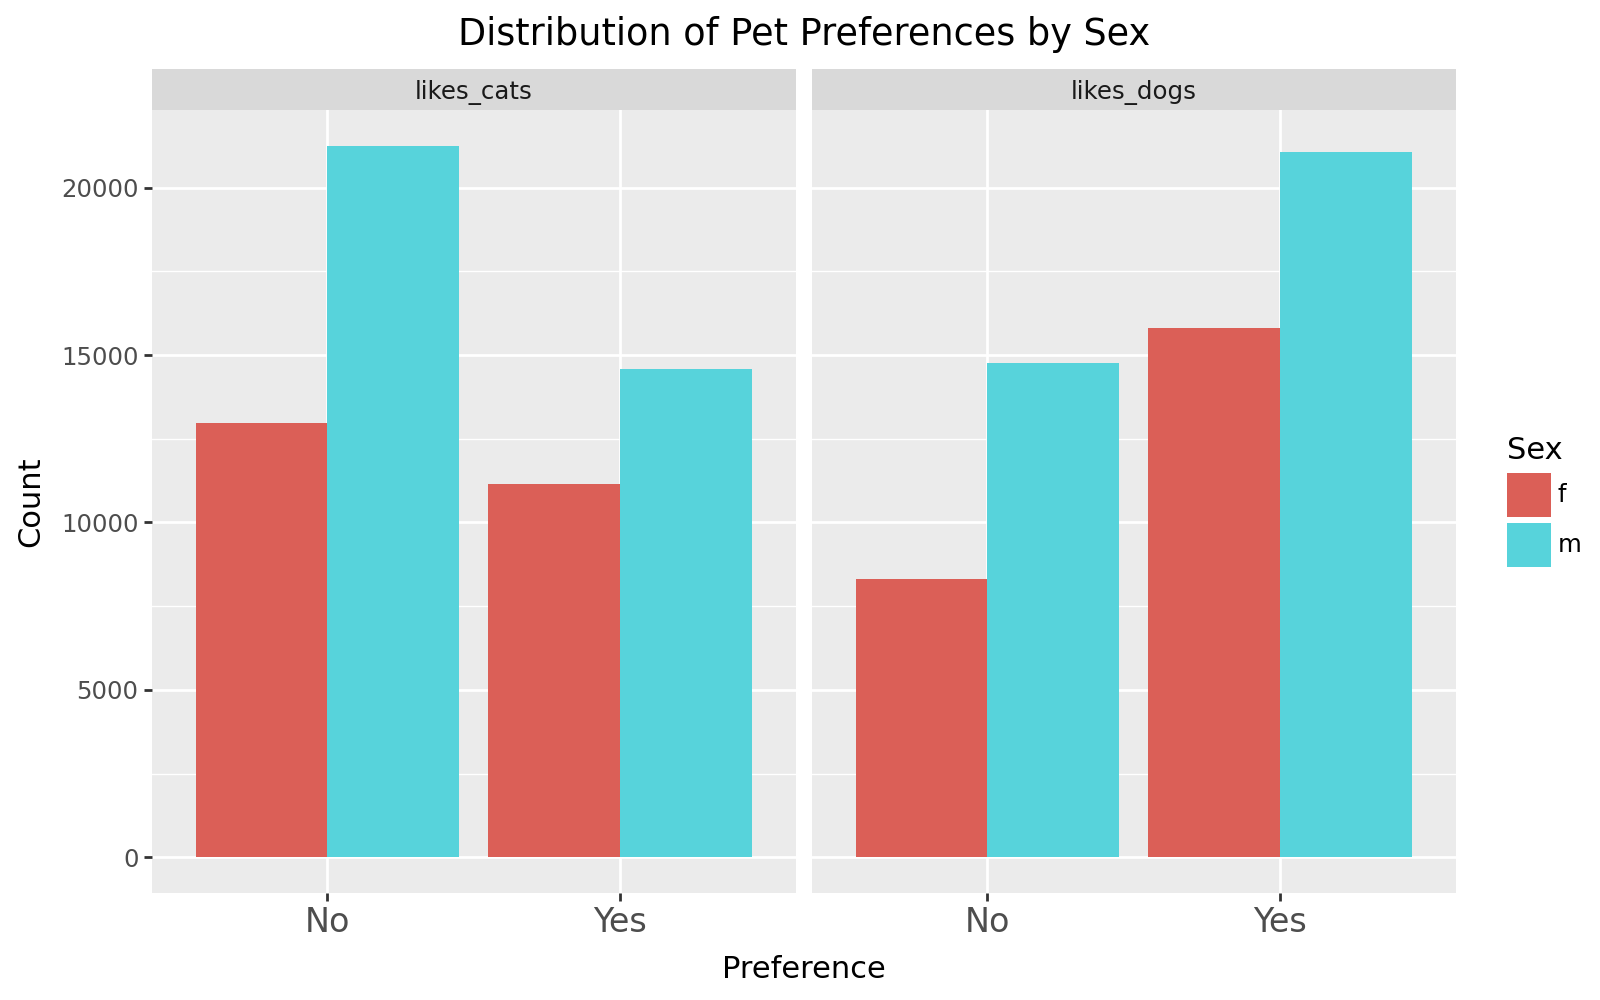

In [31]:
df_melted = df.melt(id_vars=['sex'], value_vars=['likes_dogs', 'likes_cats'], var_name='PetPreference', value_name='Likes')

plot = (
    ggplot(df_melted, aes(x='Likes', fill='sex')) +
    geom_bar(position="dodge") +  # Separate bars by sex
    facet_wrap('~PetPreference') +  # Creates two separate plots
    labs(title="Distribution of Pet Preferences by Sex", x="Preference", y="Count", fill="Sex") +
    theme(
        axis_text_x=element_text(size=12),
        figure_size=(8, 5)
    )
)
plot

### Text Preprocessing And Analysis

In [32]:
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None


class TextPreprocessor:
    APOSTROPHE = '\u2019'
    EMOTICONS_REGEX = r'[\U0001f600-\U0001f64f]+'
    DINGBATS_REGEX = r'[\U00002702-\U000027b0]+'
    TRANSPORT_AND_MAP_REGEX = r'[\U0001f680-\U0001f6c0]+'
    ENCLOSED_CHARS_REGEX = r'[\U000024c2-\U0001f251]+'
    MISC_REGEX = r'[\U000000a9-\U0001f999]'

    def make_lowercase(self, data_frame, column_name):
        data_frame[column_name] = data_frame[column_name].str.lower()
        print('make_lowercase applied')
        return data_frame

    def remove_punctuation(self, data_frame, column_name):
        PUNCT_TO_REMOVE = string.punctuation
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: text.translate(str.maketrans('', '', PUNCT_TO_REMOVE)))
        print('remove_punctuation applied')
        return data_frame

    def remove_stop_words(self, data_frame, column_name):
        STOPWORDS = set(stopwords.words('english'))
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: " ".join([word for word in str(text).split() if word not in STOPWORDS]))
        print('remove_stop_words applied')
        return data_frame

    def remove_frequent_words(self, data_frame, column_name):
        cnt = Counter()
        for text in data_frame[column_name].values:
            for word in text.split():
                cnt[word] += 1
        FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: " ".join([word for word in str(text).split() if word not in FREQWORDS]))
        print('remove_frequent_words applied')
        return data_frame

    def remove_rare_words(self, data_frame, column_name, max_rare_words_count=10):
        cnt = Counter()
        for text in data_frame[column_name].values:
            for word in text.split():
                cnt[word] += 1
        RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-max_rare_words_count - 1:-1]])
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: " ".join([word for word in str(text).split() if word not in RAREWORDS]))
        print('remove_rare_words applied')
        return data_frame

    def stem_words(self, data_frame, column_name):
        stemmer = PorterStemmer()
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: " ".join([stemmer.stem(word) for word in text.split()]))
        print('stem_words applied')
        return data_frame

    def lemmatize_words(self, data_frame, column_name):
        lemmatizer = WordNetLemmatizer()
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: " ".join([lemmatizer.lemmatize(word) for word in text.split()]))
        print('lemmatize_words applied')
        return data_frame
    
    def remove_numbers(self, data_frame, column_name):
        number_pattern = r'\d+'
        data_frame[column_name] = data_frame[column_name].apply(
            lambda text: re.sub(pattern=number_pattern, repl=" ", string=text))
        print('remove_numbers applied')
        return data_frame


    def lemmatize_words_v2(self, data_frame, column_name):
        lemmatizer = WordNetLemmatizer()
        wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
        data_frame[column_name] = data_frame[column_name].apply(lambda text: " ".join(
            [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in
             nltk.pos_tag(text.split())]))
        print('lemmatize_words_v2 applied')
        return data_frame

    def tokenize(self, data_frame, column_name):
        data_frame[column_name] = data_frame[column_name].apply(lambda text: nltk.tokenize.word_tokenize(text))
        print('tokenize applied')
        return data_frame


    def clean_text(self, data_frame, column_name):     
        data_frame_local = self.make_lowercase(data_frame, column_name)
        data_frame_local = self.remove_punctuation(data_frame_local, column_name)
        data_frame_local = self.remove_numbers(data_frame_local, column_name)
        data_frame_local = self.remove_stop_words(data_frame_local, column_name)
        data_frame_local = self.remove_rare_words(data_frame_local, column_name)
        data_frame_local = self.remove_frequent_words(data_frame_local, column_name)
        data_frame_local = self.lemmatize_words_v2(data_frame_local, column_name)
        return data_frame_local


    def remove_emojis(data):
        result = []
        for word in data:
            match = []
            match += re.findall(EMOTICONS_REGEX, word)
            match += re.findall(ENCLOSED_CHARS_REGEX, word)
            match += re.findall(DINGBATS_REGEX, word)
            match += re.findall(TRANSPORT_AND_MAP_REGEX, word)
            match += re.findall(MISC_REGEX, word)
            if not match == []:
                for item in match:
                    word = word.replace(item, '')
            result.append(word)
        return result


    def remove_empty_strings(data):
        return [word for word in data if word != '']



In [33]:
text_processor = TextPreprocessor()
df['essay'] = df[df.columns[21:]].apply(
    lambda x: ' '.join(x.astype(str)),
    axis=1
)
text_df = df[["essay"]]
df["essay"] = df["essay"].astype(str)
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,city_,state_,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,south san francisco,california,endomorph,College or more,socially,never,sometimes,Yes,Yes,about me: i would love to think that i was so...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,oakland,california,mesomorph,College or more,often,sometimes,no,Yes,Yes,i am a chef: this is what that means. 1. i am ...
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,san francisco,california,ectomorph,College or more,socially,never,no,No,Yes,"i'm not ashamed of much, but writing public te..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,berkeley,california,ectomorph,College or more,socially,never,no,No,Yes,i work in a library and go to school. . . read...
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,san francisco,california,mesomorph,College or more,socially,never,no,Yes,Yes,hey how's it going? currently vague on the pro...


In [34]:
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('averaged_perceptron_tagger_eng')
df_clean = text_processor.clean_text(text_df, 'essay')
df_clean.head(5)

make_lowercase applied
remove_punctuation applied
remove_numbers applied
remove_stop_words applied
remove_rare_words applied
remove_frequent_words applied
lemmatize_words_v2 applied


,essay
0,would think kind intellectual either dumb smar...
1,chef mean workaholic cook regardless whether w...
2,ashamed much write public text online date sit...
3,work library go school reading thing write old...
4,hey hows go currently vague profile know come ...


In [35]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

In [36]:
# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
tf_idf_vectorizer = TfidfVectorizer(
    analyzer="word",
    use_idf=True,
    smooth_idf=True,
    ngram_range=(1, 2),  # Keep both unigrams & bigrams
    max_features=10000,  # Reduce vocabulary size to 10,000 words
    max_df=0.5,  # Ignore terms that appear in more than 50% of documents
    min_df=5  # Ignore terms that appear in fewer than 5 documents
)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(df_clean['essay'])

In [37]:
dense = tf_idf_matrix.todense()
denselist = dense.tolist()
df_denselist = pd.DataFrame(
    denselist,columns=tf_idf_vectorizer.get_feature_names_out())
df_denselist.head()

,aa,abandon,abbey,ability,able,able laugh,abroad,absolute,absolutely,absorb,...,zepplin,zero,zest,zombie,zombie apocalypse,zombie movie,zombieland,zone,zoo,zoolander
0,0.0,0.0,0.0,0.0,0.098805,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052492,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# Text Kmeans Only

In [38]:
# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    n_init=10,  # Define how many times the algorithm will run with different centroid seeds
    random_state=42  # Ensure reproducibility
)

labels = clustering_model.fit_predict(tf_idf_matrix)  # Fit and predict clusters

X = tf_idf_matrix.todense()

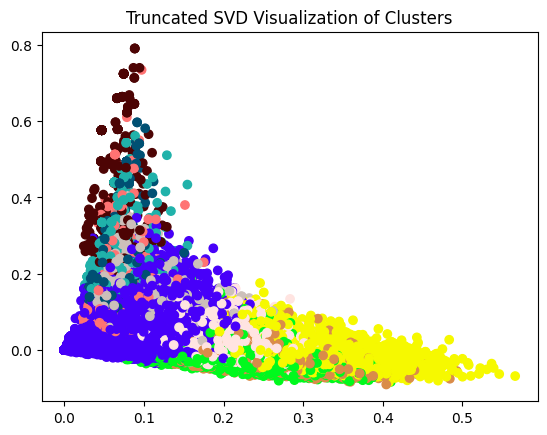

In [39]:
from sklearn.decomposition import TruncatedSVD
X = np.asarray(X)

svd = TruncatedSVD(n_components=50, random_state=42)
reduced_data = svd.fit_transform(X)
plt.close('all')
fig, ax = plt.subplots()

ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=[labels_color_map[l] for l in labels])

plt.title("Truncated SVD Visualization of Clusters")
plt.show()

In [40]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'city_', 'state_',
       'body_type_simplified', 'education_simplified', 'drinks_simplified',
       'drugs_fixed', 'smokes_fixed', 'likes_dogs', 'likes_cats', 'essay'],
      dtype='object')

In [41]:
df.isna().sum()

age                         0
status                      0
sex                         0
orientation                 0
body_type                5296
diet                    24395
drinks                   2985
drugs                   14080
education                6628
ethnicity                5680
height                      0
income                      0
job                      8198
last_online                 0
location                    0
offspring               35561
pets                        0
religion                20226
sign                    11056
smokes                   5512
speaks                     50
essay0                   5488
essay1                   7572
essay2                   9638
essay3                  11476
essay4                  10537
essay5                  10850
essay6                  13771
essay7                  12451
essay8                  19225
essay9                  12603
city_                       0
state_                      0
body_type_

# Kmeans Clustering With All Numerical + Categorical + Text Features

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.sparse import hstack

num_features = ['age', 'height']

# Standardize numeric features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[num_features])

# One-hot encode categorical features
cat_features = ['body_type_simplified', 'education_simplified', 'drinks_simplified', 'drugs_fixed', 'smokes_fixed', 'likes_dogs', 'likes_cats']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated syntax
encoded_cats = encoder.fit_transform(df[cat_features])

# Vectorize text (TF-IDF)
tf_idf_vectorizer = TfidfVectorizer(
    analyzer="word",
    use_idf=True,
    smooth_idf=True,
    ngram_range=(1, 2),
    max_features=10000,  # Reduce vocabulary size to 10,000 words
    max_df=0.5,
    min_df=5
)
tf_idf_matrix = tf_idf_vectorizer.fit_transform(df['essay'].fillna(''))  # Replace NaNs

# Apply Truncated SVD for dimensionality reduction
n_components = 100  # Adjust this based on variance explained
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_reduced = svd.fit_transform(tf_idf_matrix)

from scipy.sparse import csr_matrix

# Convert dense matrices to sparse format
scaled_numeric_sparse = csr_matrix(scaled_numeric)
encoded_cats_sparse = csr_matrix(encoded_cats)

# Combine all features
X_combined = hstack([scaled_numeric_sparse, encoded_cats_sparse, tfidf_reduced])

In [43]:
X_combined.shape

(59946, 118)

In [44]:
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, max_iter=300, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_combined)

df['cluster'] = labels  # Add cluster labels back to the dataset

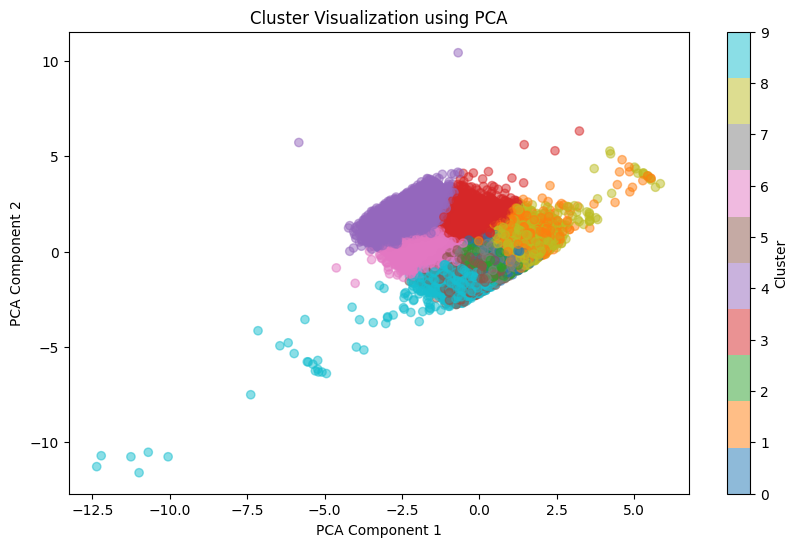

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined.toarray())  # Convert sparse to dense if needed

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='tab10', alpha=0.5)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization using PCA")
plt.show()

In [46]:
features = ['age', 'height', 'body_type_simplified', 'education_simplified', 'drinks_simplified',
           'drugs_fixed', 'smokes_fixed', 'likes_dogs', 'likes_cats', 'essay']


In [47]:
df.cluster.value_counts()

cluster
2    8178
8    7225
9    6537
7    6521
0    6441
3    6304
6    5266
1    5232
5    5052
4    3190
Name: count, dtype: int64

# Example: User 42 Analysis

In [48]:
df.loc[42:42, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
42,30,75.0,mesomorph,College or more,often,sometimes,no,No,No,i'm an optimist with a healthy sense of impend...


In [49]:
users = df.loc[(df.sex == 'f')&
              (df.cluster == df.at[42, 'cluster']) &
              (df.orientation == 'straight')].index
print(f'So we have found {len(users)} female users in the same cluster.\n')

So we have found 183 female users in the same cluster.



In [50]:
def distance(row, user):
    result = 0
    for i, v in enumerate(row):
        result += (v - user[i])**2
    return result ** 0.5

In [51]:
X_combined_df = pd.DataFrame(X_combined.toarray())
user = X_combined_df.loc[42]
distances = X_combined_df.loc[users].apply(distance, axis=1, 
                            args=(user,)).sort_values()

In [52]:
df.loc[42:42, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
42,30,75.0,mesomorph,College or more,often,sometimes,no,No,No,i'm an optimist with a healthy sense of impend...


In [53]:
df.loc[distances.index, features].head(10)

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
57793,28,73.0,mesomorph,College or more,socially,never,no,No,No,"nan i have heard her described as ""spunky"" (....."
29826,26,74.0,mesomorph,College or more,socially,never,no,No,No,"i am a down to earth, fun-loving kind of girl!..."
52809,29,73.0,mesomorph,College or more,not at all,never,no,No,No,nan i moved to the bay area a few years ago fo...
56949,33,73.0,mesomorph,College or more,rarely,never,no,No,No,nan nan nan nan books: the count of monte cris...
16132,33,73.0,mesomorph,College or more,socially,sometimes,sometimes,No,No,i just moved to berkeley from denmark for a jo...
50744,26,72.0,mesomorph,College or more,desperately,never,no,No,No,nan nan nan nan nan nan nan nan nan you're obl...
29947,30,72.0,mesomorph,College or more,socially,never,no,No,No,nan work hard play hard! :) right now a good b...
12748,33,72.0,mesomorph,College or more,socially,never,no,No,No,i'm a person who loves to get outside for a hi...
21737,36,73.0,mesomorph,College or more,socially,never,no,No,No,"i'm 6""1', no really, i am. i didn't believe it..."
2817,33,72.0,mesomorph,College or more,socially,never,no,No,No,"i like to think that i am a pretty open, hones..."


In [54]:
gamma = 1 / (len(features))

In [55]:
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100, 1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
print('Top ten users by affinity with user_id = 42')
S.head(10)

Top ten users by affinity with user_id = 42


,affinity
user_id,
57793,83.0
29826,83.0
52809,83.0
56949,82.9
16132,82.8
50744,82.8
29947,82.5
12748,82.2
21737,82.1


## Features of Those With High Affinity

***User 57793 Features***

In [56]:
df.loc[57793:57793, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
57793,28,73.0,mesomorph,College or more,socially,never,no,No,No,"nan i have heard her described as ""spunky"" (....."


***User 29826 Features***

In [57]:
df.loc[29826:29826, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
29826,26,74.0,mesomorph,College or more,socially,never,no,No,No,"i am a down to earth, fun-loving kind of girl!..."


***User 56949 Features***

In [58]:
df.loc[56949:56949, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
56949,33,73.0,mesomorph,College or more,rarely,never,no,No,No,nan nan nan nan books: the count of monte cris...


***User 42 Essay***

i'm an optimist with a healthy sense of impending doom, an artist and traveler who's also jazzed about my soul sucking office job in squaresville (emeryville).  ...aaand i'm going to finish this later. being this clever takes a lot out of me, and also makes me hate myself. until then here's a joke:  a guy walks into a bar or something.  ...i'm going to finish that later too. nan hitting things with sticks, producing pleasant sounds making people laugh making myself feel like a jerk being a reliable friend omlettes nan books: world war z, cat's cradle/galapagos/other vonnegut, everything bad is good for you, guns germs and steel, the lone ranger and tonto fistfight in heaven/other sherman alexie, shanatram, the road/anything post-apocalyptic  tv: breaking bad, archer, parks & rec, boardwalk empire, dexter, the walking dead, tim and eric (anyone?)  movies: brazil, raising arizona, mulholland drive, idiocracy, a bajillion others. nan nan seeing live music, performing live music, hanging out with the bros and bro-ettes after band practice, and on occasion sitting at home in my underwear eating cheerios, and being pretty happy about it. nan nan berkeley california mesomorph College or more often sometimes no No No

***User 57793 Essay***

nan i have heard her described as "spunky" (....and with some other choice words). but i am pretty sure that spunk (nor the lewd descriptors) captures what this enigmatic being is really about. talk to her about art, talk to her about music, talk of philosophy and aesthetics, but for god's sake don't err by talking about anything concrete. like a lynch film, i am confused by what i see, but the tone, mood, and flow is nothing less than methodically composed kickassery. i salute you tall perplexing woman of wonder editing im taller remarque is good, nina simone and coma are fantastic! sound, conversations with certain people, touch, unplanned things, dancing, early spring i do spend a lot of time not thinking, when i do think i think about patterns nan nan nan san francisco california mesomorph College or more socially never no No No

***User 29826 Essay***

i am a down to earth, fun-loving kind of girl! currently working in san francisco for a fashion designer, using my creative juices , and enjoying each and every day! smiling and styling! how tall i am! nan 1.family 2.friends 3.fashion 4.love 5.spontaneity 6.adventures nan out and about with friends! nan nan san francisco california mesomorph College or more socially never no No No

***User 56949 Essay***

nan nan nan nan books: the count of monte cristo; the da vinci code; the power of one, the southern vampire series.  movies: the good shepard, momento, usual suspects, the notebook, rudy, the chronicles of riddick, primal fear, red violin, good will hunting, serenity.  shows: mad men, true blood, chuck, the good wife, and law & order svu, criminal minds, firefly  music: 90s r&b "new jack swing" and faux country (taylor swift, lady antebellum, shania twain) and faux rock (evanescence, maroon five), i also enjoy classical music (violin and piano)  food: i love italian food, love mac and cheese, and i routinely eat at noodles and co. 1. connecting with someone through conversation. sounds corny, but isn't that what people really want? to feel some sort of connection with the people in their lives?  2. physical affection. (yep, i need a squeeze and maybe even a poke every now and then)  3. solitude ( i need time to think and recharge by myself)  4. a book or my kindle ( i need to read like a fish needs water)  5. my bankcard ( i have no idea how to "rough it." i'm not prissy, but i'm not killing a squirrel or crapping in the woods for fun either)  6. umm my macbook pro and my internet connection. i use these everyday, but when i went to europe for two months i was able to abstain, although i did experience some withdrawal.  six things i could do without 1. reality tv 2. reality tv stars ( i feel 10 iq points dumber for even knowing the name "snookie") 3. donald trump, sarah palin, and newt gingrich 4. calculus 5. high heels...really the things we women do...ridiculous. nan nan nan nan menlo park california mesomorph College or more rarely never no No No

***User 16640 Features***

In [59]:
df.loc[16440:16440, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
16440,48,63.0,mesomorph,College or more,socially,never,no,Yes,Yes,overall - i have a great life and it's full of...


In [60]:
X_combined_df = pd.DataFrame(X_combined.toarray())
user = X_combined_df.loc[16440]
distances = X_combined_df.loc[users].apply(distance, axis=1, 
                            args=(user,)).sort_values()

In [61]:
gamma = 1 / (len(features))

In [62]:
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100, 1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
print('Top three users by affinity with user_id = 16440')
S.head(3)

Top three users by affinity with user_id = 16440


,affinity
user_id,
8780,76.3
5944,76.2
54414,76.1


overall - i have a great life and it's full of incredible people and experiences but there's still room in my world for that one special person.   i'm the upbeat, happy-go-lucky type. you'll find a smile on my face most days (life is too short to let things get you down!). i believe all relationships take time to develop and grow but ultimately i'm looking for my best friend & long-term partner.   my ideal man would be emotionally available, comfortable in his own skin, affectionate, fun, creative, and a bit quirky! nan nan my smile... books: i'm usually reading several books at the same time. today, you'll find the following books on my night-stand: american gods by neil gaiman; the happiness project by gretchen rubin, and agency mania by bruno gralpois.  movies: the list is very long but some favorites include: princess bride, the sixth sense, pulp fiction, star wars, blade runner, shallow grave, breaking the waves, the single man, fargo.  food: i'll try anything at least once and i love all types of food. the only thing i do not like (well, hate) is cilantro. blech. nan nan nan nan nan el granada california mesomorph College or more socially never no Yes Yes

***User 307***

In [63]:
df.loc[307:307, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
307,34,63.0,mesomorph,College or more,socially,never,no,Yes,Yes,"i'm a local, i love the bay and have been back..."


In [64]:
X_combined_df = pd.DataFrame(X_combined.toarray())
user = X_combined_df.loc[307]
distances = X_combined_df.loc[users].apply(distance, axis=1, 
                            args=(user,)).sort_values()

In [65]:
gamma = 1 / (len(features))

In [66]:
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100, 1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
print('Top three users by affinity with user_id = 307')
S.head(3)

Top three users by affinity with user_id = 307


,affinity
user_id,
5944,79.7
30048,79.7
8780,79.7


i'm a local, i love the bay and have been back here for the past 7 years after time working/exploring in nyc and la. i love art/art galleries/interesting experiences/interesting people (& am up for pretty much anything). i enjoy appreciating beauty in the day-to-day. i stay active, i travel as much as possible. i've taken time off of work to do my own thing, i've gone to grad school and now i feel pretty settled in a career, in life. professionally i do tech transactional work. my background is in entertainment/music/ip. i'm making sure i take a few big trips now and then & i try and be super involved in my little sister's life (she's a few years younger than me and she also lives in sf), i'm trying to stay curious, i read a lot, i do yoga, i love spending time with/am close with my family & great network of friends. early august i'm heading out on an annual family backpack trip - this time through sabrina basin. nan i suppose it depends on the person looking. i have my favorites but i'm always up for something new. i love reading henry miller, watching wes anderson, seeing shows at the fillmore or independent, music festivals in general, avocados and quinoa. a beautiful view; my friends/family; my computer; intellectual stimulation; the perfect music; creative urge. my family (since most of them are here in the east bay); planning trips out of the city; the next short story; how my friends are doing; my life in general. i could be doing anything really -- i like to keep up with local happenings: art openings, any good live music that comes through, perhaps out for a nice dinner at a new restaurant...& once a month is girls' night poker. nan if you want to...but especially if you are kind, creative, thoughtful, adventurous, settled in your life. san francisco california mesomorph College or more socially never no Yes Yes

***User 629***

In [67]:
df.loc[629:629, features]

,age,height,body_type_simplified,education_simplified,drinks_simplified,drugs_fixed,smokes_fixed,likes_dogs,likes_cats,essay
629,21,74.0,mesomorph,High school or less,socially,sometimes,sometimes,No,No,nan nan being nice to beutful young ladyz and ...


In [68]:
X_combined_df = pd.DataFrame(X_combined.toarray())
user = X_combined_df.loc[629]
distances = X_combined_df.loc[users].apply(distance, axis=1, 
                            args=(user,)).sort_values()

In [69]:
gamma = 1 / (len(features))

In [70]:
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100, 1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
print('Top three users by affinity with user_id = 629')
S.head(3)

Top three users by affinity with user_id = 629


,affinity
user_id,
57977,86.5
30915,84.6
26968,84.5


nan nan being nice to beutful young ladyz and vary good with cars im cute and tall nan nan nan nan nan u got a good hart and are kinda cute hayward california mesomorph High school or less socially sometimes sometimes No No